In [1]:
import panMC
import datetime as dt
import iris

In [2]:
# query filenames for surface level variables
# change "pb" to the following to get other streams:
# pa: standard model level
# pb: single/surface level data
# pc: model level terms for calculating Q1 and Q2
# pd: pressure level
# pe: 5-min Java subdomain (MC2 only)
# pf: 5-min Bengkulu subdomain (MC2 only)
# kpp: 2&3D ocean variables
# radsim: brightness temperautures
panMC.panMC.get_outnames("MC12","pb") 

['atmos',
 'integral_inst',
 'integral_agg',
 'rainfall',
 'surf_inst',
 'surf_agg',
 'range']

In [3]:
# load metadata for 2018-19 season data in "rainfall" file
# year is start year of season. So far valid seasons are 2003, 2007, 2012, 2014, 2015, 2016, 2017, 2018
# Change MC12 to MC2 to load 2km data. So far only valid season is 2016. 
# change "rainfall" to something else in the above list to load different data
meta = panMC.panMC(2018,"MC12","rainfall")

In [4]:
# print variables contained in this file
print(meta.variables)

['stratiform_rainfall_amount', 'stratiform_snowfall_amount', 'stratiform_rainfall_flux', 'stratiform_snowfall_flux', 'convective_rainfall_amount', 'convective_snowfall_amount', 'convective_rainfall_flux', 'convective_snowfall_flux']


In [5]:
# get filepaths (implicit dates)
meta.filepath

'/gws/nopw/j04/terramaris/panMC_um/MC12_GA7/201819_u-cf309/pb/tma_N1280_KPPcoupled_pb_rainfall_{year:04d}{month:02d}{day:02d}.nc'

In [6]:
# get filepaths (implicit dates)
meta.fill_paths_with_dates([dt.datetime(2019,12,1)+dt.timedelta(i) for i in range(31)])

['/gws/nopw/j04/terramaris/panMC_um/MC12_GA7/201819_u-cf309/pb/tma_N1280_KPPcoupled_pb_rainfall_20191126.nc',
 '/gws/nopw/j04/terramaris/panMC_um/MC12_GA7/201819_u-cf309/pb/tma_N1280_KPPcoupled_pb_rainfall_20191202.nc',
 '/gws/nopw/j04/terramaris/panMC_um/MC12_GA7/201819_u-cf309/pb/tma_N1280_KPPcoupled_pb_rainfall_20191208.nc',
 '/gws/nopw/j04/terramaris/panMC_um/MC12_GA7/201819_u-cf309/pb/tma_N1280_KPPcoupled_pb_rainfall_20191214.nc',
 '/gws/nopw/j04/terramaris/panMC_um/MC12_GA7/201819_u-cf309/pb/tma_N1280_KPPcoupled_pb_rainfall_20191220.nc',
 '/gws/nopw/j04/terramaris/panMC_um/MC12_GA7/201819_u-cf309/pb/tma_N1280_KPPcoupled_pb_rainfall_20191226.nc']

In [7]:
# define iris spatial constraints
cx = iris.Constraint(longitude = lambda x: 105<=x<=120)
cy = iris.Constraint(latitude  = lambda y: -10 <=y<=-2)

In [10]:
# load data with iris. Can be run with no keyword arguments:
# - if dates is not provided then the whole 90 day season is loaded.
# - if constraints is not provided then the whole domain is loaded.
# - if variables is not provided then all variables in the file are loaded.
data=meta.load_iris(dates      =[dt.datetime(2018,12,1)+dt.timedelta(i) for i in range(6)],\
                    Constraints=cx&cy,\
                    variables=["convective_rainfall_amount","stratiform_rainfall_amount"])

In [11]:
# load data into xarray format. No constrained loading at present.  
array = meta.load_xarray(dates      =[dt.datetime(2018,12,1)+dt.timedelta(i) for i in range(6)])

In [12]:
print("iris:\n",data)
print("xarray:\n",array)

iris:
 0: convective_rainfall_amount / (kg m-2) (time: 576; latitude: 86; longitude: 106)
1: stratiform_rainfall_amount / (kg m-2) (time: 576; latitude: 86; longitude: 106)
xarray:
 <xarray.Dataset>
Dimensions:                     (time: 576, latitude: 428, longitude: 538, bnds: 2, time_0: 576)
Coordinates:
  * time                        (time) datetime64[ns] 2018-12-01T00:07:30 ......
  * latitude                    (latitude) float32 -20.02 -19.92 ... 19.92 20.02
  * longitude                   (longitude) float32 84.73 84.87 ... 160.1 160.2
  * time_0                      (time_0) datetime64[ns] 2018-12-01T00:15:00 ....
Dimensions without coordinates: bnds
Data variables:
    stratiform_rainfall_amount  (time, latitude, longitude) float32 dask.array<chunksize=(288, 214, 269), meta=np.ndarray>
    time_bnds                   (time, bnds) datetime64[ns] dask.array<chunksize=(576, 2), meta=np.ndarray>
    forecast_period_bnds        (time, bnds) float64 dask.array<chunksize=(576, 2), 

In [14]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import iris.plot as iplt

/opt/jaspy/lib/python3.8/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_period'.
  warnings.warn(msg.format(self.name()))
/opt/jaspy/lib/python3.8/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_reference_time'.
  warnings.warn(msg.format(self.name()))


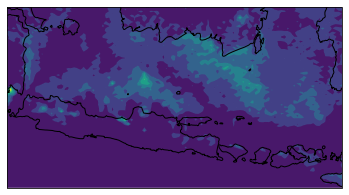

In [16]:
# do some basic plotting with iris data
ax=plt.subplot(111,projection=ccrs.PlateCarree())
ax.coastlines()
iplt.contourf(data[0][:24*4].collapsed("time",iris.analysis.MEAN))